In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from perceptron import Perceptron

Teste da implementação de perceptron
=== Informações do dataset ===
Tamanho do dataset: (569, 30)
Número de amostras: 569
Número de features: 30
Nomes das features:
   1. mean radius
   2. mean texture
   3. mean perimeter
   4. mean area
   5. mean smoothness
   6. mean compactness
   7. mean concavity
   8. mean concave points
   9. mean symmetry
  10. mean fractal dimension
  11. radius error
  12. texture error
  13. perimeter error
  14. area error
  15. smoothness error
  16. compactness error
  17. concavity error
  18. concave points error
  19. symmetry error
  20. fractal dimension error
  21. worst radius
  22. worst texture
  23. worst perimeter
  24. worst area
  25. worst smoothness
  26. worst compactness
  27. worst concavity
  28. worst concave points
  29. worst symmetry
  30. worst fractal dimension
Distribuição das classes: [212 357]
Nomes das classes: ['malignant' 'benign']
Tamanho do conjunto para treino: (455, 30)
Tamanho do conjunto para teste: (114, 30)


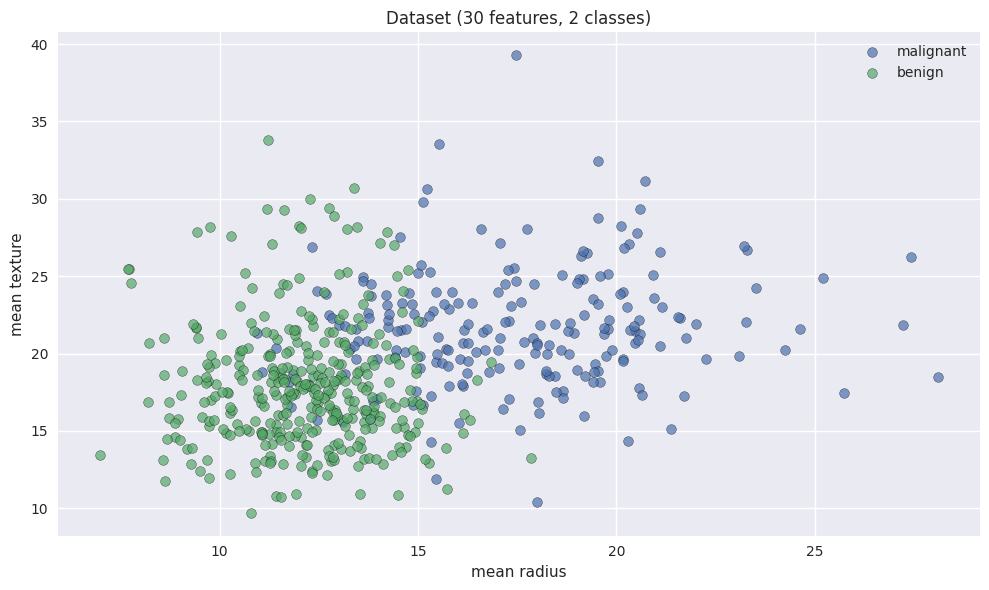

In [2]:
dataset = load_breast_cancer()
X = dataset.data  # Usar todas as 30 features do dataset
y = dataset.target

print("Teste da implementação de perceptron")
print("========================================")

print("=== Informações do dataset ===")

print(f"Tamanho do dataset: {X.shape}")
print(f"Número de amostras: {X.shape[0]}")
print(f"Número de features: {X.shape[1]}")
print("Nomes das features:")
for i, nome in enumerate(dataset.feature_names):
    print(f"  {i+1:2}. {nome}")
print(f"Distribuição das classes: {np.bincount(y)}")
print(f"Nomes das classes: {dataset.target_names}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Tamanho do conjunto para treino: {X_train.shape}")
print(f"Tamanho do conjunto para teste: {X_test.shape}")

plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(
        X[y == label, 0],
        X[y == label, 1],
        label=f"{dataset.target_names[label]}",
        alpha=0.7,
        edgecolor="k",
    )
plt.title("Dataset (30 features, 2 classes)")
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
print("=== Padronização dos dados de treino ===")

mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)
std_train[std_train == 0] = 1.0

X_train_scaled = (X_train - mean_train) / std_train
X_test_scaled = (X_test - mean_train) / std_train
X_scaled = (X - mean_train) / std_train

if np.isnan(X_train_scaled).any() or np.isinf(X_train_scaled).any():
    print("AVISO: Valores NaN ou infinitos encontrados nos dados de treino após padronização!")
    X_train_scaled = np.nan_to_num(X_train_scaled)

if np.isnan(X_test_scaled).any() or np.isinf(X_test_scaled).any():
    print("AVISO: Valores NaN ou infinitos encontrados nos dados de teste após padronização!")
    X_test_scaled = np.nan_to_num(X_test_scaled)

print(f"Antes da padronização - Média das primeiras 5 features: {mean_train[:5]}")
print(f"Antes da padronização - Desvio padrão das primeiras 5 features: {std_train[:5]}")
print(f"Depois da padronização - Média das primeiras 5 features: {np.mean(X_train_scaled, axis=0)[:5]}")
print(f"Depois da padronização - Desvio padrão das primeiras 5 features: {np.std(X_train_scaled, axis=0)[:5]}")

=== Padronização dos dados de treino ===
Antes da padronização - Média das primeiras 5 features: [1.41176352e+01 1.91850330e+01 9.18822418e+01 6.54377582e+02
 9.57440220e-02]
Antes da padronização - Desvio padrão das primeiras 5 features: [3.53192761e+00 4.26131404e+00 2.42952845e+01 3.54552925e+02
 1.39076981e-02]
Depois da padronização - Média das primeiras 5 features: [-1.82418183e-15 -3.36348775e-15 -3.60078268e-15 -2.62793450e-16
 -4.26667249e-15]
Depois da padronização - Desvio padrão das primeiras 5 features: [1. 1. 1. 1. 1.]


=== Treinamento do perceptron ===
Época 1/250, Loss (classificações incorretas) = 185
Época 2/250, Loss (classificações incorretas) = 140
Época 3/250, Loss (classificações incorretas) = 112
Época 4/250, Loss (classificações incorretas) = 91
Época 5/250, Loss (classificações incorretas) = 73
Época 6/250, Loss (classificações incorretas) = 64
Época 7/250, Loss (classificações incorretas) = 54
Época 8/250, Loss (classificações incorretas) = 49
Época 9/250, Loss (classificações incorretas) = 44
Época 10/250, Loss (classificações incorretas) = 40
Época 11/250, Loss (classificações incorretas) = 36
Época 12/250, Loss (classificações incorretas) = 32
Época 13/250, Loss (classificações incorretas) = 29
Época 14/250, Loss (classificações incorretas) = 26
Época 15/250, Loss (classificações incorretas) = 25
Época 16/250, Loss (classificações incorretas) = 25
Época 17/250, Loss (classificações incorretas) = 25
Época 18/250, Loss (classificações incorretas) = 23
Época 19/250, Loss (classificações i

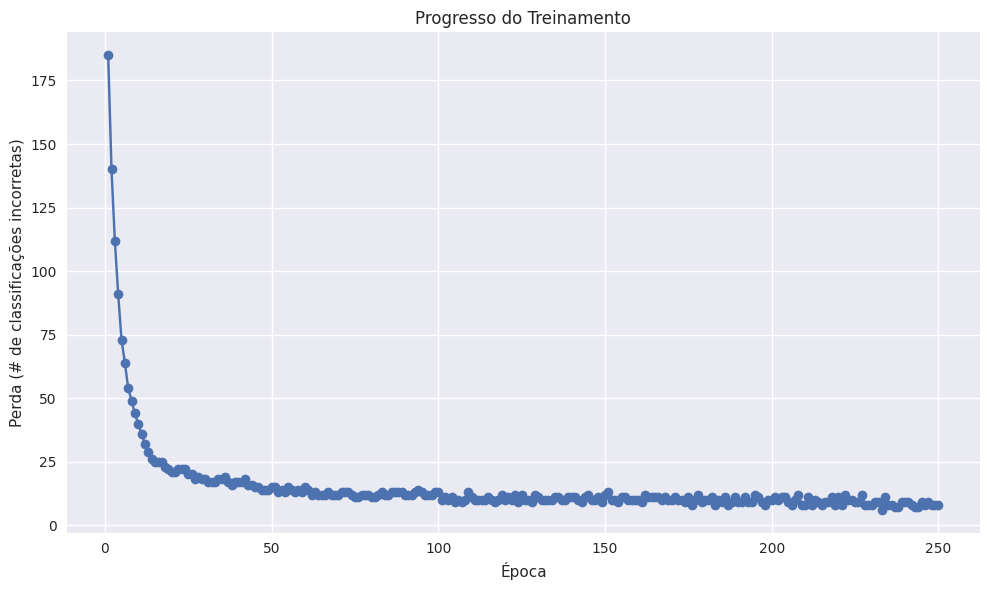

In [4]:
print("=== Treinamento do perceptron ===")

perceptron = Perceptron(num_inputs=X.shape[1], learning_rate=0.00001, random_seed=42)
losses = perceptron.fit(X_train_scaled, y_train, epochs=250)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, marker="o", linestyle="-")
plt.title("Progresso do Treinamento")
plt.xlabel("Época")
plt.ylabel("Perda (# de classificações incorretas)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
print("=== Resultados ===")

print(f"Pesos finais: {perceptron.weights}")
print(f"Viés final: {perceptron.bias}")

acc_train = perceptron.score(X_train_scaled, y_train)
acc_test = perceptron.score(X_test_scaled, y_test)

print(f"Acurácia no conjunto de treino: {acc_train * 100:.2f}%")
print(f"Acurácia no conjunto de teste: {acc_test * 100:.2f}%")

=== Resultados ===
Pesos finais: [-0.00225593 -0.00196798 -0.00070028  0.00909957 -0.00380451 -0.00415097
  0.01173721 -0.00239785  0.00102625  0.0079477  -0.00478793  0.00293105
  0.00255085 -0.02055894 -0.00309725  0.00510498 -0.00214482  0.0023416
  0.0003437  -0.00211122  0.007874   -0.0054116  -0.00550739 -0.01978658
 -0.00278211  0.00203029 -0.01243832 -0.00601582 -0.00461355  0.00129213]
Viés final: -0.0017300000000000039
Acurácia no conjunto de treino: 98.24%
Acurácia no conjunto de teste: 98.25%


=== Estatísticas de classificação ===
Verdadeiros Positivos (TP): 70
Verdadeiros Negativos (TN): 42
Falsos Positivos (FP): 1
Falsos Negativos (FN): 1


<Figure size 800x600 with 0 Axes>

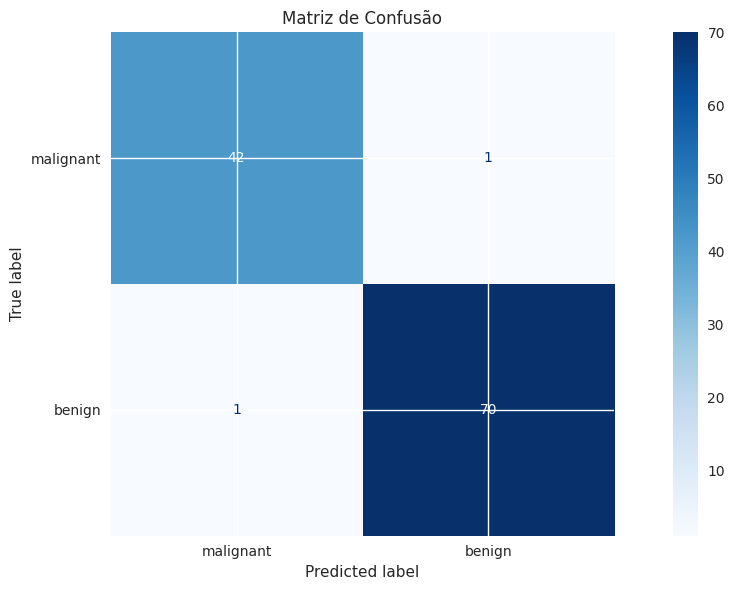

In [6]:
print("=== Estatísticas de classificação ===")

y_pred = np.array([perceptron.predict(x) for x in X_test_scaled])
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"Verdadeiros Positivos (TP): {tp}")
print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()

In [7]:
print("=== Métricas adicionais ===")

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precisão: {precision:.4f}")
print(f"Recall (sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

=== Métricas adicionais ===
Precisão: 0.9859
Recall (sensibilidade): 0.9859
F1-Score: 0.9859


In [8]:
print("=== Previsões ===")

for i in range(min(30, len(X_test_scaled))):
    x = X_test_scaled[i]
    true_y = y_test[i]
    pred_y = perceptron.predict(x)
    correct = "✓" if pred_y == true_y else "✗"
    print(f"Amostra {i+1}: Real={true_y} ({dataset.target_names[true_y]}), Previsto={pred_y} ({dataset.target_names[pred_y]}) {correct}")


=== Previsões ===
Amostra 1: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 2: Real=0 (malignant), Previsto=0 (malignant) ✓
Amostra 3: Real=0 (malignant), Previsto=0 (malignant) ✓
Amostra 4: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 5: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 6: Real=0 (malignant), Previsto=0 (malignant) ✓
Amostra 7: Real=0 (malignant), Previsto=0 (malignant) ✓
Amostra 8: Real=0 (malignant), Previsto=0 (malignant) ✓
Amostra 9: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 10: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 11: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 12: Real=0 (malignant), Previsto=0 (malignant) ✓
Amostra 13: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 14: Real=0 (malignant), Previsto=0 (malignant) ✓
Amostra 15: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 16: Real=0 (malignant), Previsto=0 (malignant) ✓
Amostra 17: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 18: Real=1 (benign), Previsto=1 (benign) ✓
Amostra 19: Real=1 (benig